# Forecasting: Car dealer ship Sales
Question:   What is the right number of cars to order compared to the resell?

In [10]:
import pandas as pd
#importing the data from a csv into pandas dataframe
carsales = pd.read_csv('carsales.csv')

I want to look at the csv file and the length and to make sure that it made it into the data frame.

In [11]:
carsales.head()
carsales

,Month,Monthly car sales in Quebec 1960-1968
0,1960-01,6550.0
1,1960-02,8728.0
2,1960-03,12026.0
3,1960-04,14395.0
4,1960-05,14587.0
...,...,...
104,1968-09,14385.0
105,1968-10,21342.0
106,1968-11,17180.0
107,1968-12,14577.0


We have 109 rows and 2 columns with one being the month and the other column is the monthly car sales in Quebec in 1960 to 1968.

In [12]:
#lets change the columns name to make if easier to see and understand
carsales.columns = ['month', 'sales']

In [31]:
carsales

,month,sales
0,1960-01,6550.0
1,1960-02,8728.0
2,1960-03,12026.0
3,1960-04,14395.0
4,1960-05,14587.0
...,...,...
104,1968-09,14385.0
105,1968-10,21342.0
106,1968-11,17180.0
107,1968-12,14577.0


In [13]:
#I need to get rid of the that last row
carsales = carsales.loc[0:107,:].copy()

In [14]:
#to double check that the 108 row has been removed
carsales

,month,sales
0,1960-01,6550.0
1,1960-02,8728.0
2,1960-03,12026.0
3,1960-04,14395.0
4,1960-05,14587.0
...,...,...
103,1968-08,16722.0
104,1968-09,14385.0
105,1968-10,21342.0
106,1968-11,17180.0


## Data Cleaning

In [15]:
#to deal with dates at a numerical number so 1960 is 0 and on
carsales['period']=list(range(108))

## Data Visualization

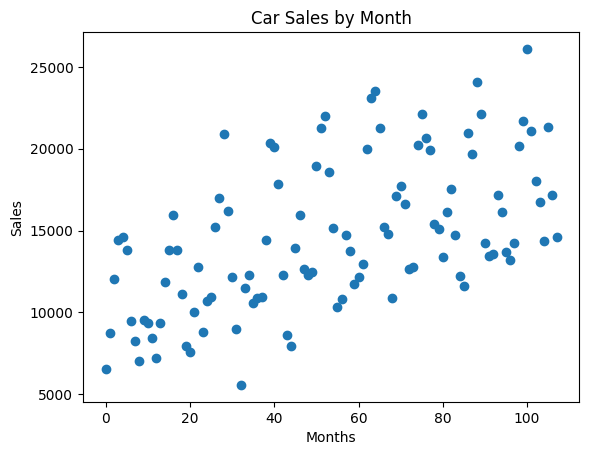

In [16]:
from matplotlib import pyplot as plt

#visualizing the the data to see if there is a trend
plt.scatter(carsales['period'],carsales['sales'])
plt.title('Car Sales by Month')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

In [17]:
#set our x and y variables
x =carsales['period'].values.reshape(-1,1)
y =carsales['sales'].values.reshape(-1,1)

# Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

In [19]:
print(regressor.coef_)
print(regressor.intercept_)

[[81.20250174]]
[10250.77726809]


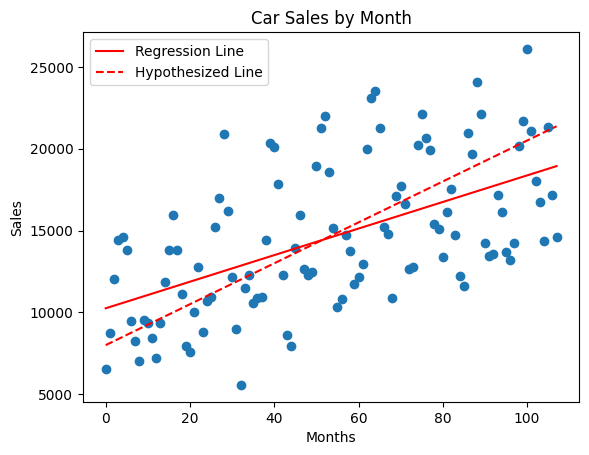

In [20]:
#plot the same graph and wiht the regression line
plt.scatter(carsales['period'],carsales['sales'])
plt.plot(carsales['period'],[81.2 * i + 10250.8 for i in \
                             carsales['period']],'r-',label='Regression Line')
plt.plot(carsales['period'],[125 * i + 8000 for i in \
                             carsales['period']],'r--',label='Hypothesized Line')
plt.legend(loc='upper left')
plt.title('Car Sales by Month')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

## Calculating error using mae and rmse

In [21]:
#functions to find the mae and rmse
import numpy as np
def get_mae(line,actual):
    error = [(x-y) for x,y in zip(line,actual)]
    errorabs = [abs(value) for value in error]
    mae = np.mean(errorabs)
    return(mae)

def get_rmse(line,actual):
    error = [(x-y) for x,y in zip(line,actual)]
    errorsqr = [value**2 for value in error]
    rmse = np.sqrt(np.mean(errorsqr))
    return(rmse)

In [22]:
saleslist = carsales['sales'].tolist()
regressionline = [81.2 * i + 10250.8 for i in carsales['period']]
hypthesizedline = [125 * i + 8000 for i in carsales['period']]

In [23]:
print(get_mae(regressionline,saleslist))
print(get_mae(hypthesizedline,saleslist))
print(get_rmse(regressionline,saleslist))
print(get_rmse(hypthesizedline,saleslist))

3154.3592592592595
3239.777777777778
3725.491219512759
3968.900519455399


## For future Trends

In [25]:
x_extended = np.append(carsales['period'],np.arange(108,116))

In [26]:
x_extended = x_extended.reshape(-1,1)
extended_prediction = regressor.predict(x_extended)

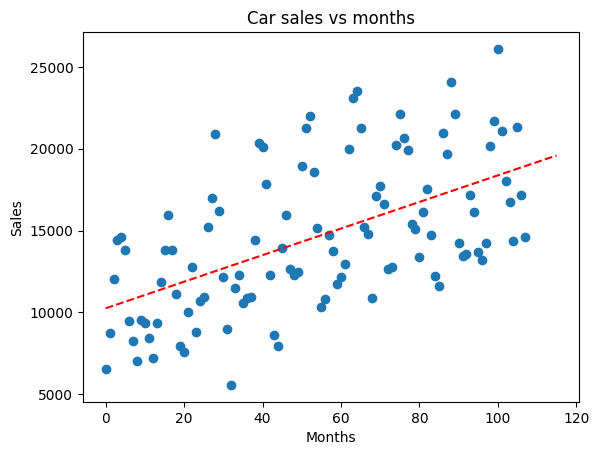

In [27]:
plt.scatter(carsales['period'],carsales['sales'])
plt.plot(x_extended,extended_prediction,'r--')
plt.title('Car sales vs months')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

## Multivariable Regression

C:\Users\Begra\AppData\Local\Temp\ipykernel_13840\333195662.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,regressor_cubic.predict(x3),'r--',color='b')


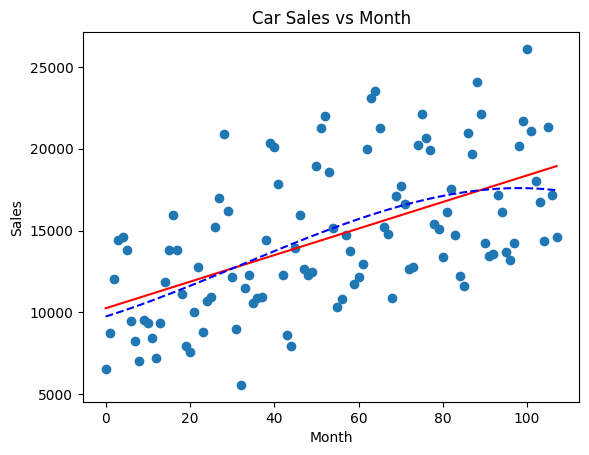

In [34]:
carsales['quadratic'] = carsales['period'].apply(lambda x : x**2)
carsales['cubic'] = carsales['period'].apply(lambda x : x**3)

x3 = carsales.loc[:,['period','quadratic','cubic']].values.reshape(-1,3)
y = carsales['sales'].values.reshape(-1,1)

regressor_cubic = LinearRegression()
regressor_cubic.fit(x3,y)
plt.scatter(carsales['period'],carsales['sales'])
plt.plot(x,regressor.predict(x),'r-')
plt.plot(x,regressor_cubic.predict(x3),'r--',color='b')
plt.title('Car Sales vs Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [44]:
complex_line = regressor_cubic.predict(x3)[:,0]
print(get_rmse(complex_line,saleslist))

3692.3009291863746


### Ploting with a line instead of dots to see more insights

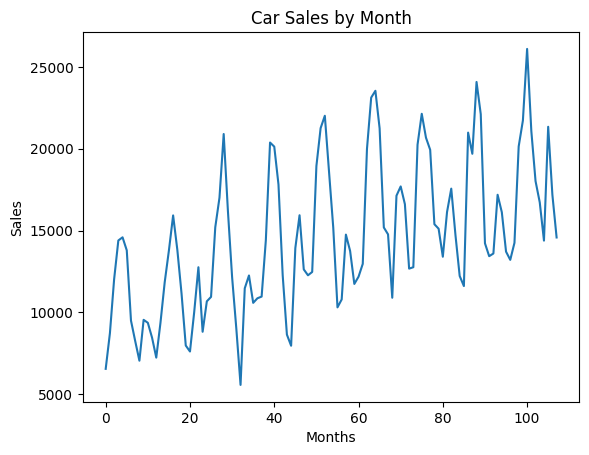

In [35]:
#instead of dots, lets show as a line graph
plt.plot(carsales['period'],carsales['sales'])
plt.title('Car Sales by Month')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

## Trig Regression

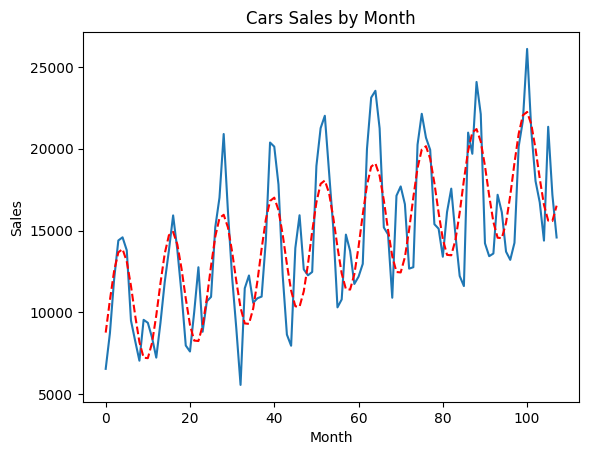

In [36]:
import math
carsales['sin_period'] = carsales['period'].apply(lambda x: math.sin(x*2*math.pi/12))
carsales['cos_period'] = carsales['period'].apply(lambda x: math.cos(x*2*math.pi/12))

x_trig = carsales.loc[:,['period','sin_period','cos_period']].values.reshape(-1,3)
y = carsales['sales'].values.reshape(-1,1)

regressor_trig = LinearRegression()
regressor_trig.fit(x_trig,y)

plt.plot(carsales['period'],carsales['sales'])
plt.plot(x, regressor_trig.predict(x_trig),'r--')
plt.title('Cars Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [37]:
trig_line = regressor_trig.predict(x_trig)[:,0]
print(get_rmse(trig_line,saleslist))

2680.552074441047


### Results with existing data


| Model Type | RMSE | 
| --- | --- | 
| Complex model | 3692 | 
| Linear model | 3725 | 
| Trig model | 2680 | 

As you can see that the trig model is the best fit so far with the data. But, I need to slit the data and see it run on to data sets to concluded that. 

## Choosing the best regression for forecasting

In [38]:
carsales['squareroot'] = carsales['period'].apply(lambda x:x**0.5)
carsales['exponent15'] = carsales['period'].apply(lambda x:x**1.5)
carsales['log'] = carsales['period'].apply(lambda x:math.log(x+1))

x_complex = carsales.loc[:,['period','log','sin_period','cos_period','squareroot','exponent15','log','quadratic','cubic']].values.reshape(-1,9)
y = carsales['sales'].values.reshape(-1,1)

regressor_complex = LinearRegression()
regressor_complex.fit(x_complex,y)
complex_line = [prediction for sublist in regressor_complex.predict(x_complex) for prediction in sublist]
print(get_rmse(complex_line,saleslist))

2610.3938122978857


In [40]:
x_complex_train = carsales.loc[0:80,['period','log','sin_period','cos_period','squareroot','exponent15','log','quadratic','cubic']].values.reshape(-1,9)
y_train = carsales.loc[0:80,'sales'].values.reshape(-1,1)

x_complex_test = carsales.loc[81:107,['period','log','sin_period','cos_period','squareroot','exponent15','log','quadratic','cubic']].values.reshape(-1,9)
y_test = carsales.loc[81:107,'sales'].values.reshape(-1,1)

regressor_complex.fit(x_complex_train,y_train)

LinearRegression()

In [41]:
x_train = carsales.loc[0:80,['period']].values.reshape(-1,1)
x_test = carsales.loc[81:107,['period']].values.reshape(-1,1)
x_trig_train = carsales.loc[0:80,['period','sin_period','cos_period']].values.reshape(-1,3)
x_trig_test = carsales.loc[81:107,['period','sin_period','cos_period']].values.reshape(-1,3)

regressor.fit(x_train,y_train)
regressor_trig.fit(x_trig_train,y_train)

complex_test_predictions = [prediction for sublist in regressor_complex.predict(x_complex_test) for prediction in sublist]
test_predictions = [prediction for sublist in regressor.predict(x_test) for prediction in sublist]
trig_test_predictions = [prediction for sublist in regressor_trig.predict(x_trig_test) for prediction in sublist]

print(get_rmse(complex_test_predictions,saleslist[81:107]))
print(get_rmse(test_predictions,saleslist[81:107]))
print(get_rmse(trig_test_predictions,saleslist[81:107]))

6006.013163814834
4115.614379193304
3461.082329259936


### Results with training set and testing set


| Model Type | RMSE | 
| --- | --- | 
| Complex model | 6006 | 
| Linear model | 4115 | 
| Trig model | 3461 | 


Answer: As you can see that the best fit model is the trig one. Therefore, there is a cyclic pattern to it. To wrap around to the question, the number would depend on what season or cycle the business is in. 